**Import all libraries**

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from skimpy import skim
from scipy.stats import skew, boxcox
from datetime import datetime, timedelta

**loading data**

In [106]:
df=pd.read_csv(r"C:\Users\Barry\Desktop\projects\indus_copper\daily_offers.xlsx.csv")
df.shape

(181673, 14)

In [107]:
data=df.copy()

In [108]:
data.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33


In [109]:
data.shape

(181673, 14)

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


# Data Preprocessing

In [111]:
data.drop_duplicates(inplace=True) #droping duplicates

In [112]:
data.shape

(181673, 14)

 **checking for currupt data in each column**

In [113]:
for i in range(len(data.columns)):
    print(data.iloc[:,i].value_counts())

EC06F063-9DF0-440C-8764-0B0C05A4F6AE    1
65203CB6-89D8-4BE3-ACBE-E5EDA0F5ACDC    1
3020E716-130E-4456-BD0A-57C4A519BE58    1
588AE510-4CB5-4A28-97D7-7F7A1E0BD0DD    1
15300D43-0ED4-49B2-B2CC-759D03E3EACC    1
                                       ..
679C1F30-3ABA-49F7-8B01-F50FEDD6D916    1
ACDD75A4-85DD-4E44-89E8-0E55CA952F85    1
40F88F5B-6C88-4896-81D0-DEE88A9F1C0A    1
3F6C6143-0A6D-4C87-B05E-1FC6973D173A    1
AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC    1
Name: id, Length: 181671, dtype: int64
20201202.0    2779
20210304.0    2088
20201124.0    1991
20210115.0    1928
20200929.0    1870
              ... 
20201219.0       1
20210313.0       1
20191919.0       1
20200829.0       1
19950000.0       1
Name: item_date, Length: 252, dtype: int64
54.15113862    1
75.11072642    1
32.43164392    1
31.92534499    1
132.3113848    1
              ..
13.86959008    1
2.738535634    1
233.2640131    1
11.94017945    1
406.6865384    1
Name: quantity tons, Length: 181673, dtype: int64
30157111.0

In [114]:
data.isna().sum() #checking for null values

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

**column "item_date " and "delivery date"**

In [115]:
#coverting item_date and delivery date, string type to pd.datetime
data['item_date']=pd.to_datetime(data['item_date'],format='%Y-%m-%d')
data['delivery date']=pd.to_datetime(data['delivery date'],format='%Y-%m-%d')

In [116]:
# creating new feature delivary time
data['delivery_time']=data['delivery date']-data['item_date']

In [117]:
data['delivery_time'].head(2)

0   0 days 00:00:00.000000300
1             0 days 00:00:00
Name: delivery_time, dtype: timedelta64[ns]

In [118]:
# converting back to string so that keep only days
data['delivery_time'] = data['delivery_time'].astype(str)
data['delivery_time'] = data['delivery_time'].apply(lambda x: x.split(" ")[0].strip())

#removing corrupt data
data.drop(data[data['delivery_time'] == 'NaT'].index, inplace=True)
#converting back to numeric
data['delivery_time']=data['delivery_time'].astype('int')

In [119]:
data['delivery_time'].value_counts()

 0    165564
-1     16107
Name: delivery_time, dtype: int64

**handling missing values**

In [120]:
print(data['application'].mode(),data['thickness'].mode(),data['selling_price'].mode())

0    10.0
Name: application, dtype: float64 0    2.0
Name: thickness, dtype: float64 0    832.0
Name: selling_price, dtype: float64


In [121]:
data.loc[data['application'].isna(), 'application'] = 10
data.loc[data['thickness'].isna(),'thickness']=2
data.loc[data['selling_price'].isna(),'selling_price']=832

In [122]:
data.drop(data[data['selling_price'] == 'NaT'].index, inplace=True)

In [123]:
data.isna().sum()

id                   2
item_date            0
quantity tons        0
customer             1
country             28
status               2
item type            0
application          0
thickness            0
width                0
material_ref     77917
product_ref          0
delivery date        0
selling_price        0
delivery_time        0
dtype: int64

**Column material_ref**

In [124]:
#more than 60% data is missing so its better to delete it
data.drop(columns='material_ref',inplace=True)

**Column "quantity tons"**

In [125]:
# Feature quantity tons is being read as object type .converting it into float64 type
data.loc[data["quantity tons"] =="e",:]
data=data.loc[data['quantity tons']!="e"]
data['quantity tons']=data['quantity tons'].astype('float64')

**column status** binary encoding

In [126]:
#inorder to capture lead we only need won and lost data ,and remaining will be removed.
data.status.value_counts()

Won                116008
Lost                34437
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: status, dtype: int64

In [127]:
data=data.loc[data.status.isin(['Won','Lost']),:] # only keeping rows with won and lost label

In [128]:
data['status']=data['status'].map({'Won':1,'Lost':0})
#Won is considered as success and Lost i s being considered as failure in getting lead
data['status']=data['status'].astype('int64')

**Column "item type"**

In [129]:
data['item type'].value_counts() # 463 values are of 'Others' type.  for which we dont item type

W         91955
S         52463
PL         5032
WI          504
Others      463
IPL          27
SLAWR         1
Name: item type, dtype: int64

In [130]:
data=data.loc[data['item type']!='Others',:]

In [131]:
data.shape

(149982, 14)

Converting categorical to numerical column

In [132]:
final_data = pd.get_dummies(data, columns = ['item type'])
#reset indexes so avoid column index in dataframe
final_data=final_data.reset_index(drop=True)

**Droping unwanted features**

In [133]:
final_data=final_data.drop(columns=['id','customer','country','item_date','delivery date'])

In [134]:
final_data

,quantity tons,status,application,thickness,width,product_ref,selling_price,delivery_time,item type_IPL,item type_PL,item type_S,item type_SLAWR,item type_W,item type_WI
0,54.151139,1,10.0,2.00,1500.0,1670798778,854.00,0,0,0,0,0,1,0
1,768.024839,1,41.0,0.80,1210.0,1668701718,1047.00,0,0,0,0,0,1,0
2,386.127949,1,28.0,0.38,952.0,628377,644.33,-1,0,0,0,0,0,1
3,202.411065,1,59.0,2.30,1317.0,1668701718,768.00,-1,0,0,1,0,0,0
4,785.526262,1,10.0,4.00,2000.0,640665,577.00,-1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149977,102.482422,1,41.0,0.96,1220.0,164141591,591.00,-1,0,0,0,0,1,0
149978,208.086469,1,41.0,0.95,1500.0,164141591,589.00,-1,0,0,0,0,1,0
149979,4.235594,1,41.0,0.71,1250.0,164141591,619.00,-1,0,0,0,0,1,0
149980,-2000.000000,1,41.0,0.85,1250.0,164141591,601.00,-1,0,0,0,0,1,0


In [135]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149982 entries, 0 to 149981
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   quantity tons    149982 non-null  float64
 1   status           149982 non-null  int64  
 2   application      149982 non-null  float64
 3   thickness        149982 non-null  float64
 4   width            149982 non-null  float64
 5   product_ref      149982 non-null  int64  
 6   selling_price    149982 non-null  float64
 7   delivery_time    149982 non-null  int32  
 8   item type_IPL    149982 non-null  uint8  
 9   item type_PL     149982 non-null  uint8  
 10  item type_S      149982 non-null  uint8  
 11  item type_SLAWR  149982 non-null  uint8  
 12  item type_W      149982 non-null  uint8  
 13  item type_WI     149982 non-null  uint8  
dtypes: float64(5), int32(1), int64(2), uint8(6)
memory usage: 9.4 MB


In [136]:
final_data.shape

(149982, 14)


# EDA

Checking for outliers

In [137]:
final_data.describe()

,quantity tons,status,application,thickness,width,product_ref,selling_price,delivery_time,item type_IPL,item type_PL,item type_S,item type_SLAWR,item type_W,item type_WI
count,149982.000000,149982.000000,149982.00000,149982.000000,149982.000000,1.499820e+05,149982.000000,149982.000000,149982.000000,149982.000000,149982.000000,149982.000000,149982.000000,149982.000000
mean,94.101255,0.770566,25.19271,2.618915,1298.172329,4.749899e+08,825.830409,-0.096712,0.000180,0.033551,0.349795,0.000007,0.613107,0.003360
std,441.291104,0.420470,17.63816,7.125319,265.845110,7.173021e+08,291.193825,0.295566,0.013416,0.180070,0.476907,0.002582,0.487040,0.057872
min,-2000.000000,0.000000,2.00000,0.180000,1.000000,6.117280e+05,-1160.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.654684,1.000000,10.00000,0.740000,1178.000000,6.283770e+05,671.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.877338,1.000000,15.00000,1.500000,1250.000000,6.406650e+05,811.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,64.343825,1.000000,41.00000,3.000000,1500.000000,1.332077e+09,952.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,70252.363070,1.000000,99.00000,2500.000000,2990.000000,1.722208e+09,81236.140000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [138]:
skim(final_data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 149982 │ │ int32       │ 9     │                                                          │
│ │ Number of columns │ 14     │ │ float64     │ 5     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name      ┃ NA  ┃ NA % ┃ mean      ┃ sd        ┃ p0     ┃ p25    ┃ p75        ┃ p100       ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ quantity tons    │   0 │    0 │        94 │       440 │  -2000 │     11 │         64 │      70000 │   █    │  │
│ │ status           │   0 │    0 │      0.77 │      0.42 │      0 │      1 │          1 │          1 │ ▂    █ │  │
│ │ application      │   0 │    0 │        25 │        18 │      2 │     10 │         41 │         99 │  █▁▄▁  │  │
│ │ thickness        │   0 │    0 │       2.6 │       7.1 │   0.18 │   0.74 │          3 │       2500 │   █    │  │
│ │ width            │   0 │    0 │      1300 │       270 │      1 │   1200 │       1500 │       3000 │  ▁█▃▁  │  │
│ │ product_ref      │   0 │    0 │ 470000000 │ 720000000 │ 610000 │ 630000 │ 1300000000 │ 1700000000 │ █    ▃ │  │
│ │ selling_price    │   0 │    0 │       830 │       290 │  -1200 │    670 │        950 │      81000 │   █    │  │
│ │ delivery_time    │   0 │    0 │    -0.097 │       0.3 │     -1 │      0 │          0 │          0 │ ▁    █ │  │
│ │ item type_IPL    │   0 │    0 │   0.00018 │     0.013 │      0 │      0 │          0 │          1 │   █    │  │
│ │ item type_PL     │   0 │    0 │     0.034 │      0.18 │      0 │      0 │          0 │          1 │   █    │  │
│ │ item type_S      │   0 │    0 │      0.35 │      0.48 │      0 │      0 │          1 │          1 │ █    ▄ │  │
│ │ item type_SLAWR  │   0 │    0 │   6.7e-06 │    0.0026 │      0 │      0 │          0 │          1 │   █    │  │
│ │ item type_W      │   0 │    0 │      0.61 │      0.49 │      0 │      0 │          1 │          1 │ ▅    █ │  │
│ │ item type_WI     │   0 │    0 │    0.0034 │     0.058 │      0 │      0 │          0 │          1 │   █    │  │
│ └──────────────────┴─────┴──────┴───────────┴───────────┴────────┴────────┴────────────┴────────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

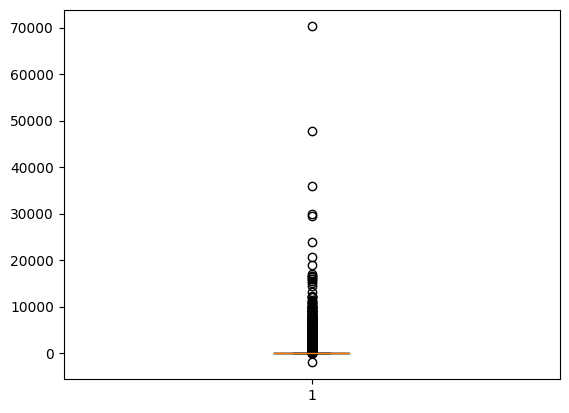

In [139]:
plt.boxplot(final_data['quantity tons']) #outlier is present 
plt.show()

In [140]:
#IQR
Q3=64
Q1=11
IQR=Q3-Q1
print(f"inter qruartile range{IQR}")
print(f"Outlier value:{Q3+1.5*IQR}")
print(f"Outlier value:{Q1-1.5*IQR}")

inter qruartile range53
Outlier value:143.5
Outlier value:-68.5


In [141]:
#Quantity cannot be negative so lets remove the -ve values
final_data.loc[final_data['quantity tons'] <= 0]

,quantity tons,status,application,thickness,width,product_ref,selling_price,delivery_time,item type_IPL,item type_PL,item type_S,item type_SLAWR,item type_W,item type_WI
88152,-4.0,1,15.0,1.50,1500.0,1332077137,723.0,0,0,0,1,0,0,0
149970,-18.0,1,41.0,0.84,1220.0,164141591,590.0,-1,0,0,0,0,1,0
149980,-2000.0,1,41.0,0.85,1250.0,164141591,601.0,-1,0,0,0,0,1,0


In [142]:
final_data=final_data.loc[~(final_data['quantity tons'] <= 0)]

In [143]:
final_data=final_data.loc[~(final_data['quantity tons'] > 200)]

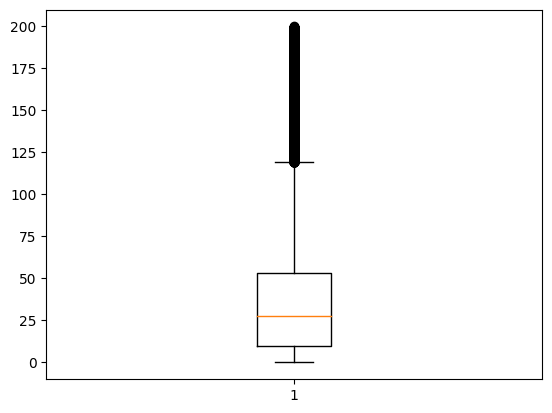

In [144]:
plt.boxplot(final_data['quantity tons']) #outlier is present 
plt.show()

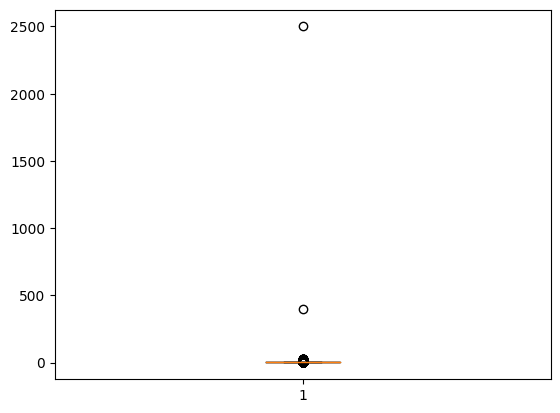

In [145]:
#Extream outlier present in thicknes column
plt.boxplot(final_data['thickness'])  
plt.show()

From above skim chart we can see that 75% of data value is 3

In [146]:
#IQR
Q3=3
Q1=0.74
IQR=Q3-Q1
print(f"inter qruartile range{IQR}")
print(f"Outlier value:{Q3+1.5*IQR}")
print(f"Outlier value:{Q1-1.5*IQR}")

inter qruartile range2.26
Outlier value:6.39
Outlier value:-2.6499999999999995


In [147]:
final_data=final_data.loc[(final_data['thickness'] <= 7.22)]
final_data=final_data.loc[~(final_data['thickness'] <= 0)]

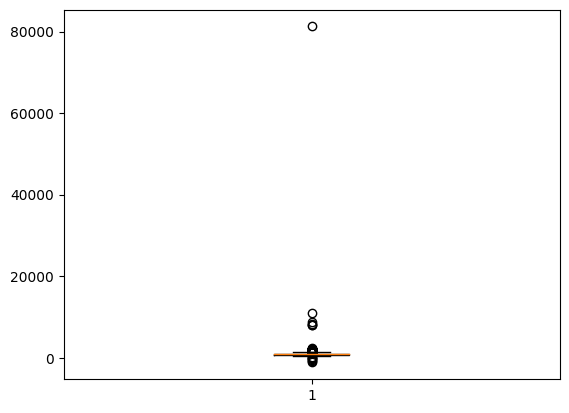

In [148]:
#selling price have some extream outliers
plt.boxplot(final_data['selling_price'])  
plt.show()

In [149]:
#from skimpy summary
Q3=950
Q1=670
IQR=Q3-Q1
print(f"inter qruartile range{IQR}")
print(f"Outlier value:{Q3+1.5*IQR}")
print(f"Outlier value:{Q1-1.5*IQR}")

inter qruartile range280
Outlier value:1370.0
Outlier value:250.0


In [150]:
final_data.loc[final_data['selling_price']>=1500]

,quantity tons,status,application,thickness,width,product_ref,selling_price,delivery_time,item type_IPL,item type_PL,item type_S,item type_SLAWR,item type_W,item type_WI
254,5.260883,1,10.0,0.60,1250.0,611993,1546.00,0,0,0,0,0,1,0
303,9.290574,1,10.0,0.55,1000.0,611993,1710.00,0,0,0,0,0,1,0
305,5.204757,1,10.0,0.55,1250.0,611993,1700.00,0,0,0,0,0,1,0
334,62.840175,1,42.0,0.18,970.0,611993,1893.00,0,0,0,0,0,1,0
336,70.933951,1,42.0,0.57,1140.0,611993,1664.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136301,32.419981,1,41.0,0.40,1250.0,611993,1519.00,0,0,0,1,0,0,0
143650,31.215987,1,10.0,0.70,1250.0,611993,1886.00,0,0,0,1,0,0,0
144468,102.296050,1,42.0,0.19,29.0,611728,1781.00,0,0,0,0,0,1,0
147408,4.499965,1,10.0,0.70,1250.0,611993,1618.79,-1,0,0,0,0,1,0


In [151]:
final_data.loc[final_data['selling_price']<=0] #selling price cannot be <= 0

,quantity tons,status,application,thickness,width,product_ref,selling_price,delivery_time,item type_IPL,item type_PL,item type_S,item type_SLAWR,item type_W,item type_WI
22,99.059199,1,41.0,0.595,1207.0,611993,-1160.0,0,0,0,0,0,1,0
36776,101.397995,1,41.0,1.250,1100.0,1721130331,-730.0,0,0,0,0,0,1,0
36821,12.225889,1,41.0,0.750,1250.0,164141591,-445.0,0,0,0,0,0,1,0
87725,5.280274,1,15.0,6.000,1250.0,1671863738,-336.0,0,0,0,0,0,1,0


In [152]:
final_data=final_data.loc[final_data['selling_price']<=1500]
final_data=final_data.loc[final_data['selling_price']>0]

In [153]:
final_data.shape

(126139, 14)

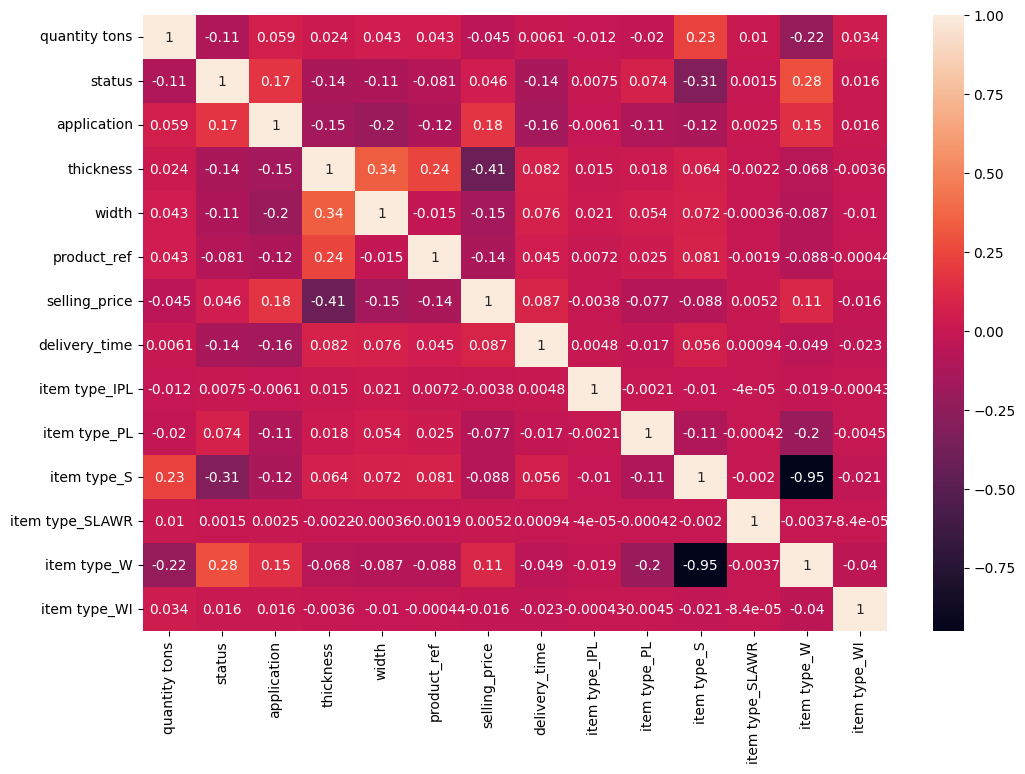

In [154]:
plt.figure(figsize=(12,8))
sns.heatmap(final_data.corr(), annot=True)
plt.show()

**Data Distribution**

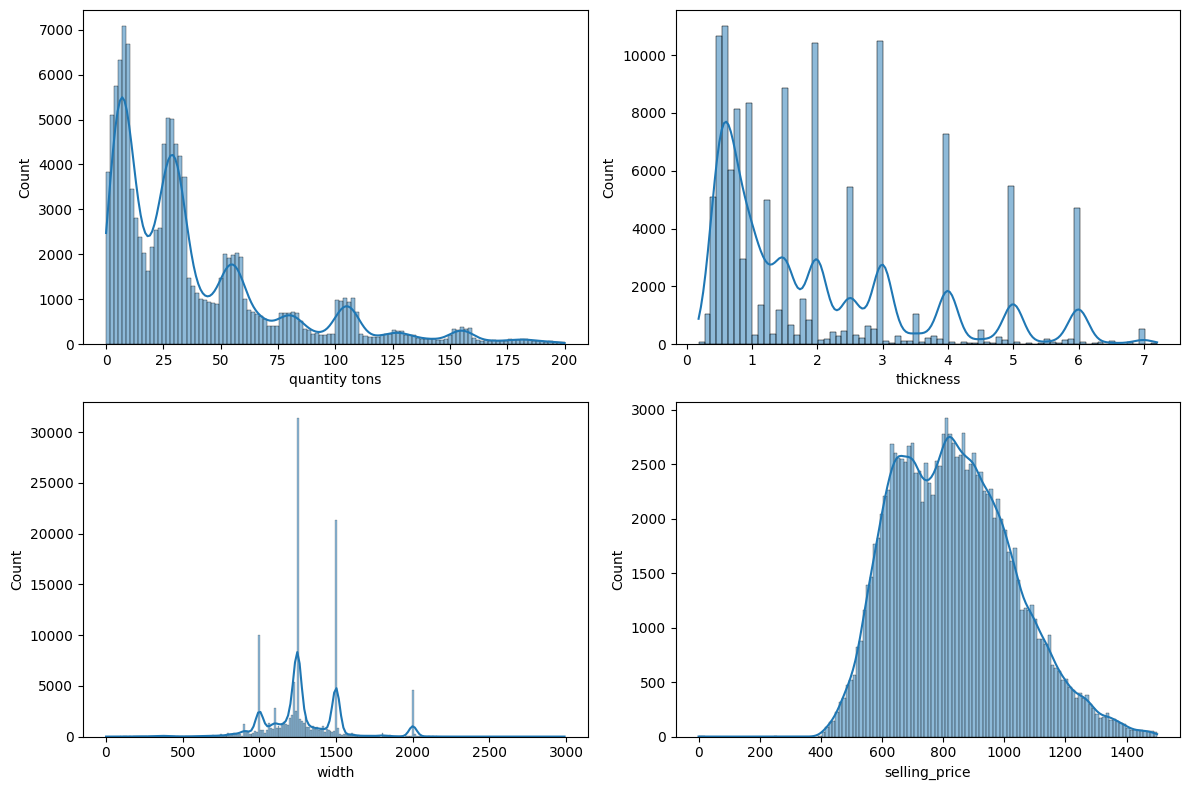

In [155]:
# Create a figure with subplots
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12, 8))
axs = axs.flatten()

# Loop through each column and create a subplot
for i, column in enumerate(['quantity tons', 'thickness', 'width', 'selling_price']):
    sns.histplot(data=final_data, x=column, ax=axs[i], kde=True)
    axs[i].set_xlabel(column)


# Show the plot
plt.tight_layout()
plt.show()

From above plot we can say tha data is skewed towords right ,so transformation is required to make it symmetrical or normal.

<Axes: xlabel='thickness', ylabel='selling_price'>

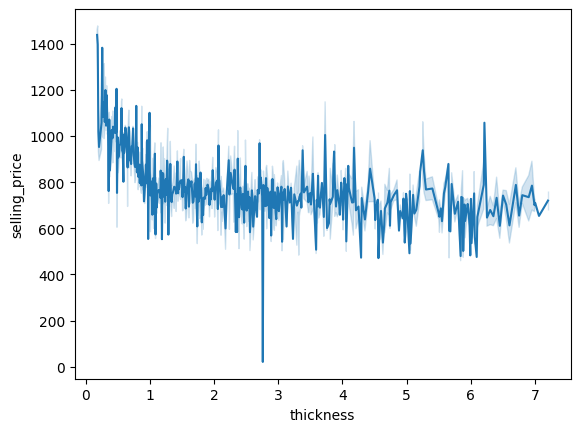

In [156]:
sns.lineplot(data=final_data, x=final_data["thickness"], y=final_data["selling_price"])

<Axes: xlabel='quantity tons', ylabel='selling_price'>

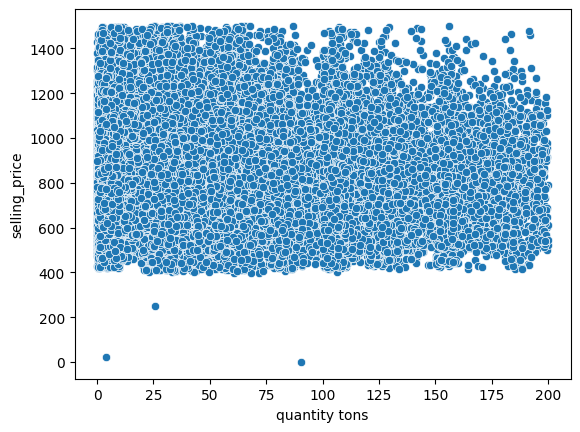

In [157]:
sns.scatterplot(data=final_data, x=final_data["quantity tons"], y=final_data["selling_price"])

From above plot we can see that there no much linear relationship between dependent and independent variables

# Data Transformation 

Lambda value used for Transformation: 0.22135959517635648


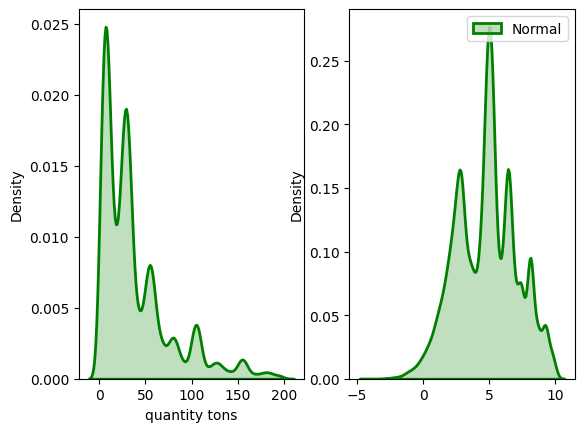

In [158]:
original_data = final_data['quantity tons']
 
# transform training data & save lambda value
fitted_data, fitted_lambda = boxcox(original_data)
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(original_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# # rescaling the subplots
# fig.set_figheight(5)
# fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")
final_data['quantity tons']=pd.DataFrame(fitted_data)

Lambda value used for Transformation: -0.09749694693317296


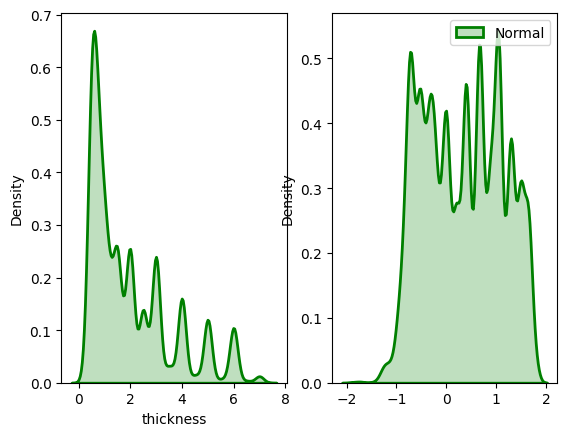

In [159]:
original_data = final_data['thickness']
 
# transform training data & save lambda value
fitted_data, fitted_lambda = boxcox(original_data)
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(original_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# # rescaling the subplots
# fig.set_figheight(5)
# fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")
final_data['thickness']=pd.DataFrame(fitted_data)

Lambda value used for Transformation: 0.9203485542126483


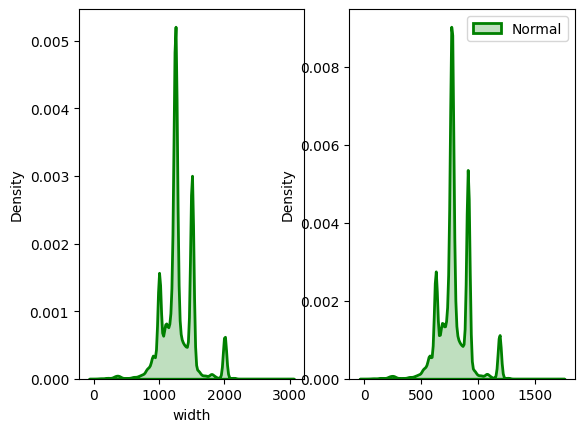

In [160]:
original_data = final_data['width']
 
# transform training data & save lambda value
fitted_data, fitted_lambda = boxcox(original_data)
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(original_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# # rescaling the subplots
# fig.set_figheight(5)
# fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")
final_data['width']=pd.DataFrame(fitted_data)

**Applying a log transformation can help normalize the target variable's distribution, reduce the impact of extreme values,
and make the relationship with predictors more linear.**

In [161]:
Y = np.log(final_data['selling_price'])

In [162]:
final_data.isnull().sum()

quantity tons      19582
status                 0
application            0
thickness          19582
width              19582
product_ref            0
selling_price          0
delivery_time          0
item type_IPL          0
item type_PL           0
item type_S            0
item type_SLAWR        0
item type_W            0
item type_WI           0
dtype: int64

In [163]:
#imputing null values with central measure
final_data['quantity tons']=final_data['quantity tons'].fillna(final_data['quantity tons'].median())
final_data['thickness']=final_data['thickness'].fillna(final_data['thickness'].median())
final_data['width']=final_data['width'].fillna(final_data['width'].median())

In [164]:
final_data.isnull().sum()

quantity tons      0
status             0
application        0
thickness          0
width              0
product_ref        0
selling_price      0
delivery_time      0
item type_IPL      0
item type_PL       0
item type_S        0
item type_SLAWR    0
item type_W        0
item type_WI       0
dtype: int64

In [165]:
final_data.shape

(126139, 14)

In [166]:
final_data.head(2)

,quantity tons,status,application,thickness,width,product_ref,selling_price,delivery_time,item type_IPL,item type_PL,item type_S,item type_SLAWR,item type_W,item type_WI
0,6.413273,1,10.0,0.670245,909.159214,1670798778,854.0,0,0,0,0,0,1,0
6,5.426085,1,41.0,-1.044038,657.893678,611993,931.0,-1,0,0,0,0,1,0


# Regression Model building

In [167]:
#split the data into train and test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score
import xgboost as xg

# Split the data

In [168]:
X=final_data.drop(columns=['selling_price','delivery_time','status'])
y=Y
print(X.shape, y.shape)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

(126139, 11) (126139,)


In [169]:
X.columns

Index(['quantity tons', 'application', 'thickness', 'width', 'product_ref',
       'item type_IPL', 'item type_PL', 'item type_S', 'item type_SLAWR',
       'item type_W', 'item type_WI'],
      dtype='object')

**Gradient boosting regressor**

In [170]:
gbr= GradientBoostingRegressor() 
gbr.fit(X_train,y_train)
y_pred_gbr=gbr.predict(X_test)
r2_score(y_test,y_pred_gbr)

0.5535826399777515

**Random forest regressor**

In [69]:
regr = RandomForestRegressor(random_state=0)
regr.fit(X_train, y_train)
y_pred_rf= regr.predict(X_test) 
r2_score(y_test,y_pred_rf)

0.5512711178465179

**XGboost regressor**

In [70]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror',n_estimators = 10, seed = 123) 
xgb_r.fit(X_train, y_train)
pred = xgb_r.predict(X_test)
  
xgb_r.score(X_test, y_test)

-0.011595885661396022

**Storing our best model into pickle file**

In [71]:
import pickle

# Assuming you have trained your model and stored it in a variable called 'classifier'

# Save the model to a pickle file
with open('regressor_model_1.pkl', 'wb') as file:
    pickle.dump(gbr, file)

In [73]:
pickle_file_path = r'C:\Users\Barry\Desktop\projects\indus_copper\regressor_model_1.pkl'
# Load the model from the pickle file
with open(pickle_file_path, 'rb') as file:
    model = pickle.load(file)

In [74]:
# model predicting log values as we trained on log values of selling data
model.predict(X_test[2:3])

array([6.65084477])

In [75]:
# getting original predictive value taking antilog
np.exp(6.65)

772.78432553515

In [76]:
X.columns

Index(['quantity tons', 'application', 'thickness', 'width', 'product_ref',
       'item type_IPL', 'item type_PL', 'item type_S', 'item type_SLAWR',
       'item type_W', 'item type_WI'],
      dtype='object')

## CLassification model building

In [77]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126139 entries, 0 to 149979
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   quantity tons    126139 non-null  float64
 1   status           126139 non-null  int64  
 2   application      126139 non-null  float64
 3   thickness        126139 non-null  float64
 4   width            126139 non-null  float64
 5   product_ref      126139 non-null  int64  
 6   selling_price    126139 non-null  float64
 7   delivery_time    126139 non-null  int32  
 8   item type_IPL    126139 non-null  uint8  
 9   item type_PL     126139 non-null  uint8  
 10  item type_S      126139 non-null  uint8  
 11  item type_SLAWR  126139 non-null  uint8  
 12  item type_W      126139 non-null  uint8  
 13  item type_WI     126139 non-null  uint8  
dtypes: float64(5), int32(1), int64(2), uint8(6)
memory usage: 8.9 MB


In [78]:
final_data['quantity tons']=final_data['quantity tons'].astype('int64')
final_data['application']=final_data['application'].astype('int64')
final_data['selling_price']=final_data['selling_price'].astype('int64')
final_data['thickness']=final_data['thickness'].astype('int64')
final_data['width']=final_data['width'].astype('int64')

In [81]:
X1=final_data.drop(columns=['status'])
y1=final_data['status']
X1.shape, y1.shape
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=0)

In [174]:
X1_test.head()

,quantity tons,application,thickness,width,product_ref,selling_price,delivery_time,item type_IPL,item type_PL,item type_S,item type_SLAWR,item type_W,item type_WI
8111,4,41,0,719,1668701718,906,0,0,0,0,0,1,0
34741,0,15,0,875,1671863738,926,0,0,0,0,0,1,0
76931,4,15,0,625,640405,632,0,0,0,1,0,0,0
130034,4,15,0,768,164141591,755,0,0,0,1,0,0,0
6550,4,41,-1,767,611993,1077,0,0,0,0,0,1,0


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.ensemble import ExtraTreesClassifier

**Gradient boosting classifier**

In [83]:
GB=GradientBoostingClassifier()
GB.fit(X1_train,y1_train)
GB_score=GB.score(X1_test,y1_test)
print("Accuracy:",GB_score, "   ","f1_score:",f1_score(y1_test,GB.predict(X1_test),average='macro'))

Accuracy: 0.803472332329158     f1_score: 0.6142990108721179


**DecisionTreeClassifier**

In [84]:
DT=DecisionTreeClassifier()
DT.fit(X1_train,y1_train)
DT_score=DT.score(X1_test,y1_test)
print("Accuracy:",DT_score, "   ","f1_score:",f1_score(y1_test,DT.predict(X1_test),average='macro'))

Accuracy: 0.7905501823370857     f1_score: 0.6943366671201543


**XGBClassifier**

In [85]:
xgb_clf = xg.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_clf.fit(X1_train, y1_train)
y_pred = xgb_clf.predict(X1_test)
score = xgb_clf.score(X1_test, y1_test)

print("Accuracy:", score," ","f1 score",f1_score(y1_test,xgb_clf.predict(X1_test),average='macro'))

Accuracy: 0.8033930553353417   f1 score 0.6084040353159306


**Extra Tree Classifier**

In [176]:
etc = ExtraTreesClassifier(n_estimators=100, random_state=42)
etc.fit(X1_train, y1_train)
y_pred = etc.predict(X1_test)
score = etc.score(X1_test, y1_test)
print("Accuracy:", score," ","f1 score",f1_score(y1_test,etc.predict(X1_test),average='macro'))

Accuracy: 0.8168701442841287   f1 score 0.7134504389316101


In [87]:
y_pred=etc.predict(X1_test)
from sklearn.metrics import roc_auc_score

# y_true: true binary labels (0 or 1)
# y_score: predicted probability scores (range between 0 and 1) or binary labels (0 or 1)
auroc_score = roc_auc_score(y1_test,y_pred)

print("AUROC Score: {:.4f}".format(auroc_score))

AUROC Score: 0.7024


**Hyper parameter tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split

# Define the grid of hyperparameters to search
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_features": ["auto", "sqrt", "log2"],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(etc, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X1_train, y1_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the performance of the model on the testing data using the best hyperparameters
score = f1_score(y1_test,grid_search.predict(X1_test))
print("Score on testing data:", score)

In [154]:
# Extra tree regressor with hyper parameter tuning
etc_tune = ExtraTreesClassifier(n_estimators=100, random_state=42,max_depth= None,max_features='auto',min_samples_leaf= 2, min_samples_split= 10)
etc_tune.fit(X1_train, y1_train)
y_pred = etc_tune.predict(X1_test)
score = etc_tune.score(X1_test, y1_test)
print("Accuracy:", score," ","f1 score",f1_score(y1_test,etc_tune.predict(X1_test),average='macro'))

Accuracy: 0.8169485225794462   f1 score 0.6755380852126387


In [89]:
y_pred=etc_tune.predict(X1_test)
from sklearn.metrics import roc_auc_score

# y_true: true binary labels (0 or 1)
# y_score: predicted probability scores (range between 0 and 1) or binary labels (0 or 1)
auroc_score = roc_auc_score(y1_test,y_pred)

print("AUROC Score: {:.4f}".format(auroc_score))

**Comaprision between deafult and tuned model of extra tree regressor**

In [156]:
pd.DataFrame({'f1_score':[0.68,0.67],'AUROC score':[0.651,0.651]},index=['Default ETC','Tuned ETC'])

,f1_score,AUROC score
Default ETC,0.68,0.651
Tuned ETC,0.67,0.651


In [177]:
print(classification_report(y1_test, etc.predict(X1_test)))

              precision    recall  f1-score   support

           0       0.59      0.50      0.54      5440
           1       0.87      0.90      0.89     19788

    accuracy                           0.82     25228
   macro avg       0.73      0.70      0.71     25228
weighted avg       0.81      0.82      0.81     25228



In [90]:
import pickle

# Assuming you have trained your model and stored it in a variable called 'classifier_model_1'

# Save the model to a pickle file
with open('classifier_model_1.pkl', 'wb') as file:
    pickle.dump(etc, file)